In [63]:
%matplotlib inline
import re
from os import path, getenv, environ
from typing import Dict

from datetime import datetime

import folium
import matplotlib.pyplot as plt
#import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import scipy
import scipy.stats as stats
import seaborn as sns
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [87]:
base_class = pd.read_csv("full_data.csv", sep=",")

<ipython-input-87-cf8900206d81>:1: DtypeWarning: Columns (8,64) have mixed types. Specify dtype option on import or set low_memory=False.
  base_class = pd.read_csv("base_class22(1).csv", sep=",")


In [88]:
base_class.head()

,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num,pp_mens_act,pp_an_act,soe_pres22,soe_ra,Annee_pres22,Annee_cons22,genre_cat,type_benef_cat
0,0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,Salarie,[45; 50[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.049167,0.590000,12.0,0.590000,2022,2022,2,1
1,00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[10; 15[,Salarie et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.050238,0.602857,12.0,0.602857,2022,2022,3,4
2,0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 5[,Salarie et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.000000,0.000000,12.0,0.000000,2022,no cons,3,4
3,00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25; 30[,Salarie et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.098972,1.187667,12.0,1.187667,2022,2022,3,3
4,0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,Salarie,[30; 35[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.739254,8.871048,12.0,8.871048,2022,2022,1,1


In [89]:
relevant_columns = [
     'ra_01', 'ra_02', 'ra_03', 'ra_04', 'ra_05', 'ra_06', 'ra_07', 'ra_08', 'ra_09', 'ra_10', 'ra_11', 'ra_12',
    'genre', 'type_benef', 'Foyer22', "Age22", 'pp_mens_act', "code_postal"
]

In [90]:
base_class_kmeans = base_class[relevant_columns]

In [91]:
base_class_kmeans = pd.get_dummies(base_class_kmeans, columns=['genre', 'type_benef', 'Foyer22'], prefix=['is_genre', 'is_benef', 'is_foyer'])

In [92]:
department_to_region = {
    '75': 'IDF', '77': 'IDF', '78': 'IDF', '91': 'IDF',
    '92': 'IDF', '93': 'IDF', '94': 'IDF', '95': 'IDF',
    '99': 'ETR',
}
default_region = 'OTH'



# Extract department numbers
base_class_kmeans['department'] = base_class_kmeans['code_postal'].astype(str).str[:2]

# Apply the mapping
base_class_kmeans['region'] = base_class_kmeans['department'].map(department_to_region).fillna(default_region)

# One-hot encode regions
base_class_kmeans = pd.get_dummies(base_class_kmeans, columns=['region'], prefix='region')

base_class_kmeans = base_class_kmeans.drop('department', axis=1)

In [93]:
boolean_cols = base_class_kmeans.select_dtypes(include='bool').columns
base_class_kmeans[boolean_cols] = base_class_kmeans[boolean_cols].astype(int)

In [94]:
base_class_kmeans.head()

,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,Age22,pp_mens_act,code_postal,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarie,is_foyer_ND,is_foyer_Salarie et 1 enfant,is_foyer_Salarie et 2 enfants,is_foyer_Salarie et 3+ enfants,is_foyer_Salarie et conjoint et 1 enfant,is_foyer_Salarie et conjoint et 2 enfants,is_foyer_Salarie et conjoint et 3+ enfants,is_foyer_Salarie et conjoint sans enfant,is_foyer_Salarie seul,region_ETR,region_IDF,region_OTH
0,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,45.0,0.049167,13540,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,10.0,0.050238,41000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,3.0,0.000000,99999,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,26.0,0.098972,75018,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,32.0,0.739254,33400,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [95]:
base_class_kmeans = base_class_kmeans.drop('code_postal', axis=1)

In [96]:
scaler = StandardScaler()

base_class_scaled = scaler.fit_transform(base_class_kmeans)
base_class_scaled = pd.DataFrame(base_class_scaled, columns=base_class_kmeans.columns)

In [97]:
base_class_scaled.head()

,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,Age22,pp_mens_act,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarie,is_foyer_ND,is_foyer_Salarie et 1 enfant,is_foyer_Salarie et 2 enfants,is_foyer_Salarie et 3+ enfants,is_foyer_Salarie et conjoint et 1 enfant,is_foyer_Salarie et conjoint et 2 enfants,is_foyer_Salarie et conjoint et 3+ enfants,is_foyer_Salarie et conjoint sans enfant,is_foyer_Salarie seul,region_ETR,region_IDF,region_OTH
0,-0.059818,0.054227,-0.066163,-0.055342,-0.056255,-0.065665,-0.05179,-0.051772,-0.058213,-0.058602,-0.06057,-0.058427,0.313229,-0.124592,-0.658475,1.400310,-0.749692,-0.419857,-0.202416,-0.597511,0.908768,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,1.977902,-0.497460,-0.275293,-0.637962,-0.580915,-0.478751,0.884213
1,-0.059818,-0.053537,-0.066163,0.059154,-0.056255,-0.065665,-0.05179,-0.051772,-0.058213,-0.058602,-0.06057,-0.058427,-0.644005,-0.124060,1.518660,-0.714127,-0.749692,-0.419857,-0.202416,1.673610,-1.100390,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,1.977902,-0.497460,-0.275293,-0.637962,-0.580915,-0.478751,0.884213
2,-0.059818,-0.053537,-0.066163,-0.055342,-0.056255,-0.065665,-0.05179,-0.051772,-0.058213,-0.058602,-0.06057,-0.058427,-0.835452,-0.149014,1.518660,-0.714127,-0.749692,-0.419857,-0.202416,1.673610,-1.100390,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,-0.505586,2.010211,-0.275293,-0.637962,1.721421,-0.478751,-1.130949
3,-0.059818,0.065491,-0.066163,-0.055342,-0.056255,-0.065665,-0.05179,-0.051772,-0.058213,-0.058602,-0.06057,0.032937,-0.206413,-0.099853,1.518660,-0.714127,-0.749692,-0.419857,4.940316,-0.597511,-1.100390,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,-0.505586,2.010211,-0.275293,-0.637962,-0.580915,2.088769,-1.130949
4,-0.059818,-0.053537,-0.066163,-0.055342,-0.056255,-0.065665,0.05065,0.254064,-0.058213,1.204431,-0.06057,-0.058427,-0.042315,0.218186,-0.658475,-0.714127,1.333881,-0.419857,-0.202416,-0.597511,0.908768,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,1.977902,-0.497460,-0.275293,-0.637962,-0.580915,-0.478751,0.884213


In [108]:
# Removing outliers
from scipy.stats import zscore
base_class_array = base_class_kmeans.values

base_class_array = base_class_array.astype(np.float32)
z_scores = np.abs(zscore(base_class_array))
outliers = np.where(z_scores > 3)

print("Outliers:", outliers, len(outliers))


base_class_array_cleaned = base_class_array[(z_scores < 3).all(axis=1)]


Outliers: (array([     3,      5,      6, ..., 804625, 804627, 804629]), array([18, 28, 28, ..., 25, 18, 22])) 2


In [110]:
def initialize_centroids(base_class, k):

    centroids = base_class[np.random.choice(base_class.shape[0], k, replace=False)]
    return centroids

In [111]:
def assign_clusters(base_class, centroids):

    distances = np.linalg.norm(base_class[:, np.newaxis] - centroids, axis=2)

    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

In [112]:
def update_centroids(base_class, cluster_labels, k):
    new_centroids = np.array([base_class[cluster_labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

In [113]:
def kmeans(base_class, k, max_iters=100, tol=1e-4):

    # Initialisation des centroids

    centroids = initialize_centroids(base_class, k)

    for _ in range(max_iters):
        # On attribu à chaque point un cluster
        cluster_labels = assign_clusters(base_class, centroids)

        # On calcule les nouveaux centroids
        new_centroids = update_centroids(base_class, cluster_labels, k)

        # On vérifie la convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids
            # Calculate WCSS (sum of squared distances to closest centroid)
        wcss = np.sum(
          np.min(np.linalg.norm(base_class[:, np.newaxis] - centroids, axis=2) ** 2, axis=1)
        )
    return cluster_labels, centroids, wcss

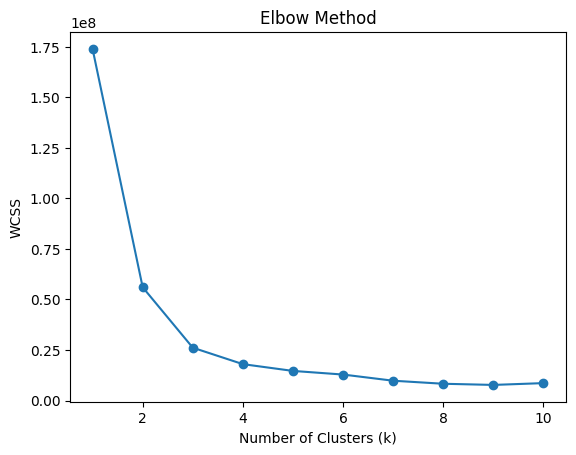

In [116]:
# Elbow method to determine optimal k


wcss = []
for k in range(1, 11):
    _, _, current_wcss = kmeans(base_class_array_cleaned, k)
    wcss.append(current_wcss)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Pick k = 3

k = 3

In [114]:
cluster_labels, final_centroids, _ = kmeans(base_class_array_cleaned, k = 3)

print("Cluster Labels:", cluster_labels)
print("Final Centroids:", final_centroids)

Cluster Labels: [0 1 1 ... 2 2 1]
Final Centroids: [[2.6204473e-01 2.4998076e-01 2.7451202e-01 2.6121339e-01 2.6128790e-01
  2.6227212e-01 2.4812655e-01 2.1431600e-01 2.5307208e-01 2.5984627e-01
  2.6288375e-01 2.7078274e-01 5.1967403e+01 2.5669318e-01 0.0000000e+00
  5.4456329e-01 4.5543674e-01 2.2101106e-01 0.0000000e+00 0.0000000e+00
  7.7898896e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.7682778e-01 2.3026410e-01 0.0000000e+00 4.9290812e-01
  1.9531263e-01 1.9020395e-01 6.1448342e-01]
 [1.9034205e-01 1.5028302e-01 1.8812259e-01 1.7542633e-01 1.7436086e-01
  1.8932870e-01 1.5733707e-01 1.5045160e-01 2.1544203e-01 2.1045847e-01
  2.0433450e-01 2.1045776e-01 9.0873766e+00 1.8469468e-01 9.6813112e-01
  1.7100528e-02 1.4768330e-02 5.3249573e-04 0.0000000e+00 9.6813112e-01
  3.1336363e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.3943030e-01 5.2990741e-01 0.0000000e+00 3.0662317e-02
  2.6754203e-01 1.8168889e-01 5.5076909e

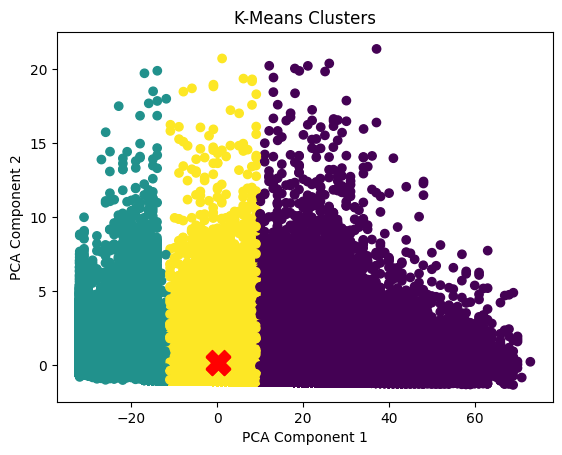

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
base_class_pca = pca.fit_transform(base_class_array_cleaned)


plt.scatter(base_class_pca[:, 0], base_class_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=300, c='red', marker='X')  # Centroids
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters')
plt.show()


In [117]:
# Save the original column names
original_column_names = base_class_kmeans.columns.tolist()

# Create the DataFrame with proper column names
clustered_data = pd.DataFrame(base_class_array_cleaned, columns=original_column_names)

# Add the cluster labels
clustered_data['Cluster'] = cluster_labels

# Group by Cluster and calculate the mean
print(clustered_data.groupby('Cluster').mean())

            ra_01     ra_02     ra_03     ra_04     ra_05     ra_06     ra_07  \
Cluster                                                                         
0        0.262044  0.249982  0.274513  0.261212  0.261287  0.262272  0.248127   
1        0.190343  0.150283  0.188124  0.175427  0.174361  0.189329  0.157338   
2        0.158149  0.146488  0.169967  0.160725  0.168357  0.165959  0.149690   

            ra_08     ra_09     ra_10     ra_11     ra_12      Age22  \
Cluster                                                                
0        0.214316  0.253072  0.259845  0.262881  0.270781  51.967403   
1        0.150452  0.215441  0.210457  0.204334  0.210459   9.087377   
2        0.134341  0.158463  0.164052  0.162423  0.176584  31.714567   

         pp_mens_act  is_genre_Enfant  is_genre_Femme  is_genre_Homme  \
Cluster                                                                 
0           0.256695         0.000000        0.544563        0.455437   
1           0.

In [118]:
cluster_0 = pd.DataFrame(clustered_data[clustered_data['Cluster'] == 0])
cluster_1 = pd.DataFrame(clustered_data[clustered_data['Cluster'] == 1])
cluster_2 = pd.DataFrame(clustered_data[clustered_data['Cluster'] == 2])

In [119]:
cluster_0.head()

,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,Age22,pp_mens_act,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarie,is_foyer_ND,is_foyer_Salarie et 1 enfant,is_foyer_Salarie et 2 enfants,is_foyer_Salarie et 3+ enfants,is_foyer_Salarie et conjoint et 1 enfant,is_foyer_Salarie et conjoint et 2 enfants,is_foyer_Salarie et conjoint et 3+ enfants,is_foyer_Salarie et conjoint sans enfant,is_foyer_Salarie seul,region_ETR,region_IDF,region_OTH,Cluster
0,0.000000,0.59,0.000,0.0,0.0,0.00,0.000000,0.000,0.000000,0.0000,0.000000,0.0,45.0,0.049167,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
8,0.967500,0.00,0.000,0.0,0.0,1.34,0.665714,0.000,0.000000,0.6115,0.000000,0.0,72.0,0.298726,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
10,0.000000,0.00,1.185,0.0,0.0,0.00,0.000000,0.000,0.000000,0.0000,0.000000,0.0,55.0,0.098750,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
13,0.763333,0.00,0.000,0.0,0.0,0.71,0.000000,0.710,0.893333,0.0000,0.000000,0.0,54.0,0.256389,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
17,1.396667,0.00,0.000,0.0,0.0,0.00,0.000000,3.972,0.000000,3.6800,3.441667,0.0,62.0,1.040861,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
